In [1]:
# 환경 설정
from mlwpy import *
%matplotlib inline

import cv2

In [2]:
docs = ["the cat in the hat",
        "the cow jumped over the moon",
        "the cat mooed and the cow meowed",
        "the cat said to the cow cow you are not a cat"]

In [3]:
vocabulary = set(" ".join(docs).split())

In [4]:
common_words = set(['a', 'to', 'the', 'in', 'and', 'are'])
vocabulary = vocabulary - common_words
print(textwrap.fill(str(vocabulary)))

{'cat', 'cow', 'mooed', 'hat', 'you', 'over', 'said', 'jumped', 'not',
'meowed', 'moon'}


In [5]:
# {k:v for k in lst}로 keys:values로부터 딕셔너리를 생성합니다.
# 이를 딕셔너리 컴프리헨션이라고 합니다.
doc_contains = [{w:(w in d) for w in vocabulary} for d in docs]
display(pd.DataFrame(doc_contains))

,cat,cow,mooed,hat,you,over,said,jumped,not,meowed,moon
0,True,False,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,True,False,False,True
2,True,True,True,False,False,False,False,False,False,True,False
3,True,True,False,False,True,False,True,False,True,False,False


In [8]:
word_count = [{w:d.count(w) for w in vocabulary} for d in docs]
wcs = pd.DataFrame(word_count)
display(wcs)

,cat,cow,mooed,hat,you,over,said,jumped,not,meowed,moon
0,1,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,1,0,0,1
2,1,1,1,0,0,0,0,0,0,1,0
3,2,2,0,0,1,0,1,0,1,0,0


In [9]:
import sklearn.feature_extraction.text as sk_txt
sparse = sk_txt.CountVectorizer(stop_words='english').fit_transform(docs)
sparse

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [10]:
sparse.todense()

matrix([[1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 0, 0, 1, 1, 0, 0],
        [2, 2, 0, 0, 0, 0, 0, 1]])

In [11]:
doc_freq = pd.DataFrame(wcs.astype(np.bool).sum(axis='rows')).T
display(doc_freq)

,cat,cow,mooed,hat,you,over,said,jumped,not,meowed,moon
0,3,3,1,1,1,1,1,1,1,1,1


In [12]:
idf = np.log(len(docs) / doc_freq) 
#  == np.log(len(docs)) - np.log(doc_freq)
display(idf)

,cat,cow,mooed,hat,you,over,said,jumped,not,meowed,moon
0,0.2877,0.2877,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863


In [13]:
tf_idf  = wcs * idf.iloc[0]   # 곱셈을 위해 열들을 맞춰줍니다.
display(tf_idf)

,cat,cow,mooed,hat,you,over,said,jumped,not,meowed,moon
0,0.2877,0.0000,0.0000,1.3863,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.2877,0.0000,0.0000,0.0000,1.3863,0.0000,1.3863,0.0000,0.0000,1.3863
2,0.2877,0.2877,1.3863,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3863,0.0000
3,0.5754,0.5754,0.0000,0.0000,1.3863,0.0000,1.3863,0.0000,1.3863,0.0000,0.0000


In [14]:
skpre.Normalizer(norm='l1').fit_transform(wcs)

array([[0.5   , 0.    , 0.    , 0.5   , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    ],
       [0.    , 0.25  , 0.    , 0.    , 0.    , 0.25  , 0.    , 0.25  ,
        0.    , 0.    , 0.25  ],
       [0.25  , 0.25  , 0.25  , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.25  , 0.    ],
       [0.2857, 0.2857, 0.    , 0.    , 0.1429, 0.    , 0.1429, 0.    ,
        0.1429, 0.    , 0.    ]])

In [15]:
sparse = (sk_txt.TfidfVectorizer(norm='l1', stop_words='english')
                .fit_transform(docs))
sparse.todense()

matrix([[0.3896, 0.    , 0.6104, 0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.2419, 0.    , 0.379 , 0.    , 0.    , 0.379 , 0.    ],
        [0.1948, 0.1948, 0.    , 0.    , 0.3052, 0.3052, 0.    , 0.    ],
        [0.3593, 0.3593, 0.    , 0.    , 0.    , 0.    , 0.    , 0.2814]])

In [16]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train')

In [17]:
print("the groups:")
print(textwrap.fill(str(twenty_train.target_names)))

the groups:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
'sci.space', 'soc.religion.christian', 'talk.politics.guns',
'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [18]:
print("\n".join(twenty_train.data[0].splitlines()[:10]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 


In [19]:
ct_vect     = sk_txt.CountVectorizer()
tfidf_xform = sk_txt.TfidfTransformer()

docs_as_counts = ct_vect.fit_transform(twenty_train.data)
docs_as_tfidf  = tfidf_xform.fit_transform(docs_as_counts)

In [20]:
model = naive_bayes.MultinomialNB().fit(docs_as_tfidf, 
                                        twenty_train.target)

In [21]:
doc_pipeline = pipeline.make_pipeline(sk_txt.CountVectorizer(),
                                      sk_txt.TfidfTransformer(),
                                      naive_bayes.MultinomialNB())

In [22]:
categories = ['misc.forsale',
              'comp.graphics', 
              'sci.med', 
              'sci.space']

In [23]:
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

doc_pipeline = pipeline.make_pipeline(sk_txt.TfidfVectorizer(),
                                      naive_bayes.MultinomialNB())


model = doc_pipeline.fit(twenty_train.data, twenty_train.target)

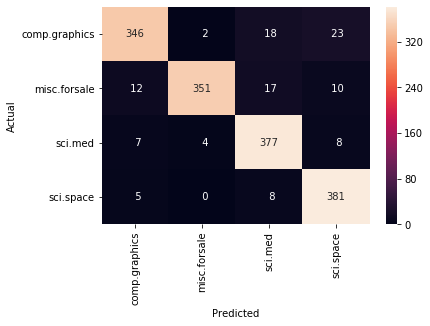

In [24]:
twenty_test = fetch_20newsgroups(subset='test',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

doc_preds = model.predict(twenty_test.data)
cm = metrics.confusion_matrix(twenty_test.target, doc_preds)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=twenty_test.target_names, 
                 yticklabels=twenty_test.target_names,
                 fmt='3d') # 셀 안에는 횟수가 기록되어 있습니다.
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

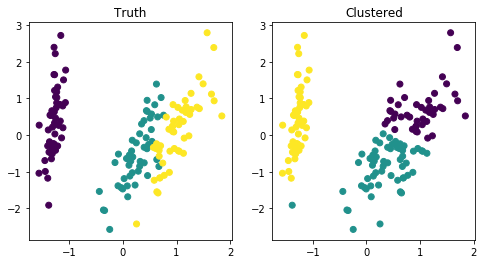

In [25]:
iris = datasets.load_iris()
twod_iris = (decomposition.PCA(n_components=2, whiten=True)
                          .fit_transform(iris.data))
clusters = cluster.KMeans(n_clusters=3).fit(twod_iris)

fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].scatter(*twod_iris.T, c=iris.target)
axes[1].scatter(*twod_iris.T, c=clusters.labels_)

axes[0].set_title("Truth"), axes[1].set_title("Clustered");

In [26]:
# 브라우저에서 아래 링크에 접속하면 이미지 데이터셋이 다운로드됩니다.
# www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
# 압축파일을 data 폴더에 넣고 압축을 해제하면
# 101_ObjectCategories 폴더가 생성됩니다.

# 데이터를 탐색합니다.
objcat_path = "./data/101_ObjectCategories"
cat_paths = glob.glob(osp.join(objcat_path, "*"))
all_categories = [d.split('/')[-1] for d in cat_paths]

print("number of categories:", len(all_categories))
print("first 10 categories:\n",
      textwrap.fill(str(all_categories[:10])))

number of categories: 102
first 10 categories:
 ['gerenuk', 'hawksbill', 'headphone', 'ant', 'butterfly', 'lamp',
'strawberry', 'water_lilly', 'chandelier', 'dragonfly']


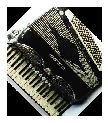

In [27]:
from skimage.io import imread

test_path = osp.join(objcat_path, 'accordion', 'image_0001.jpg')
test_img = imread(test_path)

fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.imshow(test_img)
ax.axis('off');

In [28]:
def img_to_local_words(img):
    ' 이미지로부터 로컬 비주얼 단어를 생성하는 함수입니다. '
    sift = cv2.xfeatures2d.SIFT_create()
    key_points, descriptors = sift.detectAndCompute(img, None)
    return descriptors

def id_to_path(img_id):
    ' 이미지의 경로를 찾아주는 함수입니다. '
    cat, num = img_id
    return osp.join(objcat_path, cat, "image_{:04d}.jpg".format(num))

def add_local_words_for_img(local_ftrs, img_id):
    ' local_ftrs의 값을 업데이트합니다. '
    cat, _ = img_id
    img_path = id_to_path(img_id)
    img = imread(img_path)
    local_ftrs.setdefault(cat, []).append(img_to_local_words(img))

In [29]:
# 상수 파라미터를 설정합니다. 
use_cats = ['accordion', 'airplanes', 'anchor']
use_imgs = range(1,11)

img_ids  = list(it.product(use_cats, use_imgs))
num_imgs = len(img_ids)

global_vocab_size = 20

In [30]:
# 각 이미지를 로컬 비주얼 단어가 담긴 테이블로 변환합니다.
# (이미지 당 테이블 하나, 단어 하나 당 행이 하나씩 생깁니다.)
local_words = {}
for img_id in img_ids:
    add_local_words_for_img(local_words, img_id)
print(local_words.keys())

dict_keys(['accordion', 'airplanes', 'anchor'])


In [31]:
# itcfi는 아이템이 담긴 반복자(iterator)로부터 아이템을 꺼내옵니다. 
# 이름이 길기 때문에 줄여서 표현했습니다.
itcfi = it.chain.from_iterable 

img_local_word_cts = [lf.shape[0] for lf in itcfi(local_words.values())]
print("num of local words for images:")
print(textwrap.fill(str(img_local_word_cts), width=50))

num of local words for images:
[804, 796, 968, 606, 575, 728, 881, 504, 915, 395,
350, 207, 466, 562, 617, 288, 348, 671, 328, 243,
102, 271, 580, 314, 48, 629, 417, 62, 249, 535]


In [32]:
# 로컬 단어 테이블이 얼마나 가로로 길까요?
num_local_words = local_words[use_cats[0]][0].shape[1]

# 로컬 단어는 모두 몇개나 될까요?
all_local_words = list(itcfi(local_words.values()))
tot_num_local_words = sum(lw.shape[0] for lw in all_local_words)
print('total num local words:', tot_num_local_words)

# 클러스터링을 위해 로컬 테이블을 결합합니다.
# np_array_fromiter는 이 장의 마무리에서 소개하겠습니다.
lwa_shape = (tot_num_local_words, num_local_words)
local_word_arr = np_array_fromiter(itcfi(all_local_words),
                                   lwa_shape)
print('local word tbl:', local_word_arr.shape)

total num local words: 14459
local word tbl: (14459, 128)


In [33]:
# 로컬 단어를 클러스터링하고 이를 글로벌 단어로 번역합니다.
translator = cluster.KMeans(n_clusters=global_vocab_size)
global_words = translator.fit_predict(local_word_arr)
print('translated words shape:', global_words.shape)

translated words shape: (14459,)


In [34]:
# 로컬 단어가 어떤 이미지에 속해 있는지 확인합니다.
# enumerate_outer는 이 장의 마무리에서 소개합니다.
which_img = enumerate_outer(all_local_words)
print('which img len:', len(which_img))

# 글로벌 단어를 히스토그램으로 변환합니다.
counts = co.Counter(zip(which_img, global_words))
imgs_as_bogvw = np.zeros((num_imgs, global_vocab_size))
for (img, global_word), count in counts.items():
    imgs_as_bogvw[img, global_word] = count
print('shape hist table:', imgs_as_bogvw.shape)

which img len: 14459
shape hist table: (30, 20)


In [35]:
# local_ftrs.values()는 
# [[img1, img2], [img3, img4, img5], etc.]를 반환합니다.
# 이미지의 카테고리를 출력해봅니다.
img_tgts = enumerate_outer(local_words.values())
print('img tgt values:', img_tgts[:10])

img tgt values: [0 0 0 0 0 0 0 0 0 0]


In [36]:
# 학습 모델을 만들고 훈련합니다.
std_svc = pipeline.make_pipeline(skpre.StandardScaler(), svm.SVC())
svc = std_svc.fit(imgs_as_bogvw, img_tgts)

In [37]:
def image_to_example(img_id, translator):
    ' from an id, produce an example with global words '
    img_local  = img_to_local_words(imread(id_to_path(img_id)))
    img_global = translator.predict(img_local)
    img_bogvw  = np.bincount(img_global, 
                             minlength=translator.n_clusters)     
    return img_bogvw.reshape(1,-1).astype(np.float64)

In [38]:
for cat in use_cats:
    test = image_to_example((cat, 12), translator)
    print(svc.predict(test))

[0]
[1]
[2]


In [39]:
class BOVW_XForm:
    def __init__(self):
        pass
    
    def _to_local_words(self, img_ids):
        # 이미지를 로컬 비주얼 단어로 된 테이블로 변환합니다.
        local_words = {}
        for img_id in img_ids:
            add_local_words_for_img(local_words, img_id)

        itcfi = it.chain.from_iterable
        all_local_words = list(itcfi(local_words.values()))
        return all_local_words
    
    def fit(self, img_ids, tgt=None):
        all_local_words = self._to_local_words(img_ids)
        tot_num_local_words = sum(lw.shape[0] for lw in all_local_words)
        local_word_arr = np_array_fromiter(itcfi(all_local_words), 
                                           (tot_num_local_words, num_local_words))
        self.translator = cluster.KMeans(n_clusters=global_vocab_size)
        self.translator.fit(local_word_arr)
        return self

    def transform(self, img_ids, tgt=None):
        all_local_words = self._to_local_words(img_ids)
        tot_num_local_words = sum(lw.shape[0] for lw in all_local_words)
        local_word_arr = np_array_fromiter(itcfi(all_local_words), 
                                           (tot_num_local_words, num_local_words))
        global_words = self.translator.predict(local_word_arr)
        
        # 글로벌 단어를 히스토그램으로 변환합니다.
        which_img = enumerate_outer(all_local_words)
        counts = co.Counter(zip(which_img, global_words))
        imgs_as_bogvw = np.zeros((len(img_ids), global_vocab_size))
        for (img, global_word), count in counts.items():
            imgs_as_bogvw[img, global_word] = count        
        return imgs_as_bogvw

In [40]:
use_cats = ['watch', 'umbrella', 'sunflower', 'kangaroo']
use_imgs = range(1,40)

img_ids  = list(it.product(use_cats, use_imgs))
num_imgs = len(img_ids)

cat_id = {c:i for i,c in enumerate(use_cats)}
img_tgts = [cat_id[ii[0]] for ii in img_ids]

In [41]:
(train_img, test_img, 
 train_tgt, test_tgt) = skms.train_test_split(img_ids, img_tgts)
bovw_pipe = pipeline.make_pipeline(BOVW_XForm(), 
                                   skpre.StandardScaler(),
                                   svm.SVC())
bovw_pipe.fit(train_img, train_tgt);

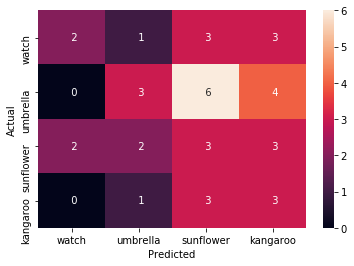

In [42]:
img_preds = bovw_pipe.predict(test_img)
cm = metrics.confusion_matrix(test_tgt, img_preds)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=use_cats, 
                 yticklabels=use_cats,
                 fmt='3d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [43]:
def enumerate_outer(outer_seq):
    ''' 바깥쪽의 인덱스를 안쪽의 길이만큼 반복합니다.'''
    return np.repeat(*zip(*enumerate(map(len, outer_seq))))

def np_array_fromiter(itr, shape, dtype=np.float64):
    ''' np.fromiter가 1D만 처리하기 때문에 이 함수를 만들었습니다.'''
    arr = np.empty(shape, dtype=dtype)
    for idx, itm in enumerate(itr):
        arr[idx] = itm
    return arr

In [44]:
enumerate_outer([[0,1], [10, 20,30], [100,200]])

array([0, 0, 1, 1, 1, 2, 2])

In [45]:
np_array_fromiter(enumerate(range(0,50,10)), (5,2))

array([[ 0.,  0.],
       [ 1., 10.],
       [ 2., 20.],
       [ 3., 30.],
       [ 4., 40.]])